In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [125]:
data = pd.read_csv(r'/Users/aniketyadav/Downloads/gapminder.csv')
data22 = pd.read_csv(r'/Users/aniketyadav/Downloads/gapminder.csv')

In [126]:
data[data['gdp']==data['gdp'].max()]['country']

1962    Luxembourg
Name: country, dtype: object

In [127]:
data['gdp'].describe()

count      3633.000000
mean      11966.053675
std       17105.787953
min         238.000000
25%        1470.000000
50%        4280.000000
75%       13600.000000
max      105000.000000
Name: gdp, dtype: float64

In [128]:
data.groupby(['continent','country']).mean()

year   life_exp  hdi_index  co2_consump  \
continent     country                                                   
Africa        Algeria       2008.0  73.571429   0.697095     3.241905   
              Angola        2008.0  58.438095   0.498700     1.025000   
              Benin         2008.0  60.176190   0.478952     0.426905   
              Botswana      2008.0  53.623810   0.645286     2.425714   
              Burkina Faso  2008.0  56.619048   0.369579     0.125157   
...                            ...        ...        ...          ...   
South America Guyana        2008.0  65.233333   0.643000     2.350000   
              Paraguay      2008.0  75.928571   0.684286     0.797429   
              Peru          2008.0  77.366667   0.718143     1.419476   
              Suriname      2008.0  71.471429   0.715333     3.718571   
              Uruguay       2008.0  75.990476   0.774524     1.919524   

                                     gdp   services  
continent     country                                
Africa        Algeria        3739.047619  56.228571  
              Angola         3468.571429  47.604762  
              Benin           992.761905  36.319048  
              Botswana       5720.952381  58.200000  
              Burkina Faso    558.809524  27.519048  
...                                  ...        ...  
South America Guyana         4713.809524  54.500000  
              Paraguay       4568.095238  54.690476  
              Peru           4758.095238  53.504762  
              Suriname       8044.285714  67.576190  
              Uruguay       12418.095238  68.461905  

[175 rows x 6 columns]

In [129]:
data.head()

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services
0,Afghanistan,Asia,1998,53.3,0.344,0.0522,NaN,24.4
1,Afghanistan,Asia,1999,54.7,0.348,0.0402,NaN,24.6
2,Afghanistan,Asia,2000,54.7,0.350,0.0370,NaN,24.7
3,Afghanistan,Asia,2001,54.8,0.353,0.0376,NaN,24.7
4,Afghanistan,Asia,2002,55.5,0.384,0.0471,333.0,25.6


In [130]:
data.isnull().sum()

country          0
continent        0
year             0
life_exp         0
hdi_index      112
co2_consump      4
gdp             42
services         0
dtype: int64

In [131]:
data['gdp']=data['gdp'].fillna(data['gdp'].interpolate())

In [132]:
data['hdi_index'] = data['hdi_index'].fillna(data['hdi_index'].interpolate())

In [133]:
data.head(100)

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services
0,Afghanistan,Asia,1998,53.3,0.344,0.0522,NaN,24.4
1,Afghanistan,Asia,1999,54.7,0.348,0.0402,NaN,24.6
2,Afghanistan,Asia,2000,54.7,0.350,0.0370,NaN,24.7
3,Afghanistan,Asia,2001,54.8,0.353,0.0376,NaN,24.7
4,Afghanistan,Asia,2002,55.5,0.384,0.0471,333.0,25.6
...,...,...,...,...,...,...,...,...
95,Argentina,South America,2009,75.8,0.821,4.4200,12400.0,75.6
96,Argentina,South America,2010,75.9,0.829,4.5700,13600.0,75.4
97,Argentina,South America,2011,76.0,0.835,4.6100,14200.0,75.4
98,Argentina,South America,2012,76.2,0.834,4.6000,13900.0,75.7


In [134]:
top10 = ['Denmark', 'Sweden', 'Norway', 'Canada', 'Finland', 'Germany', 'Australia', 'Netherlands', 'New Zealand','Switzerland']
c = data[data['country'].isin(top10)].groupby('country')['life_exp'].mean().reset_index()
c['life_exp'] = c['life_exp']/82.185714

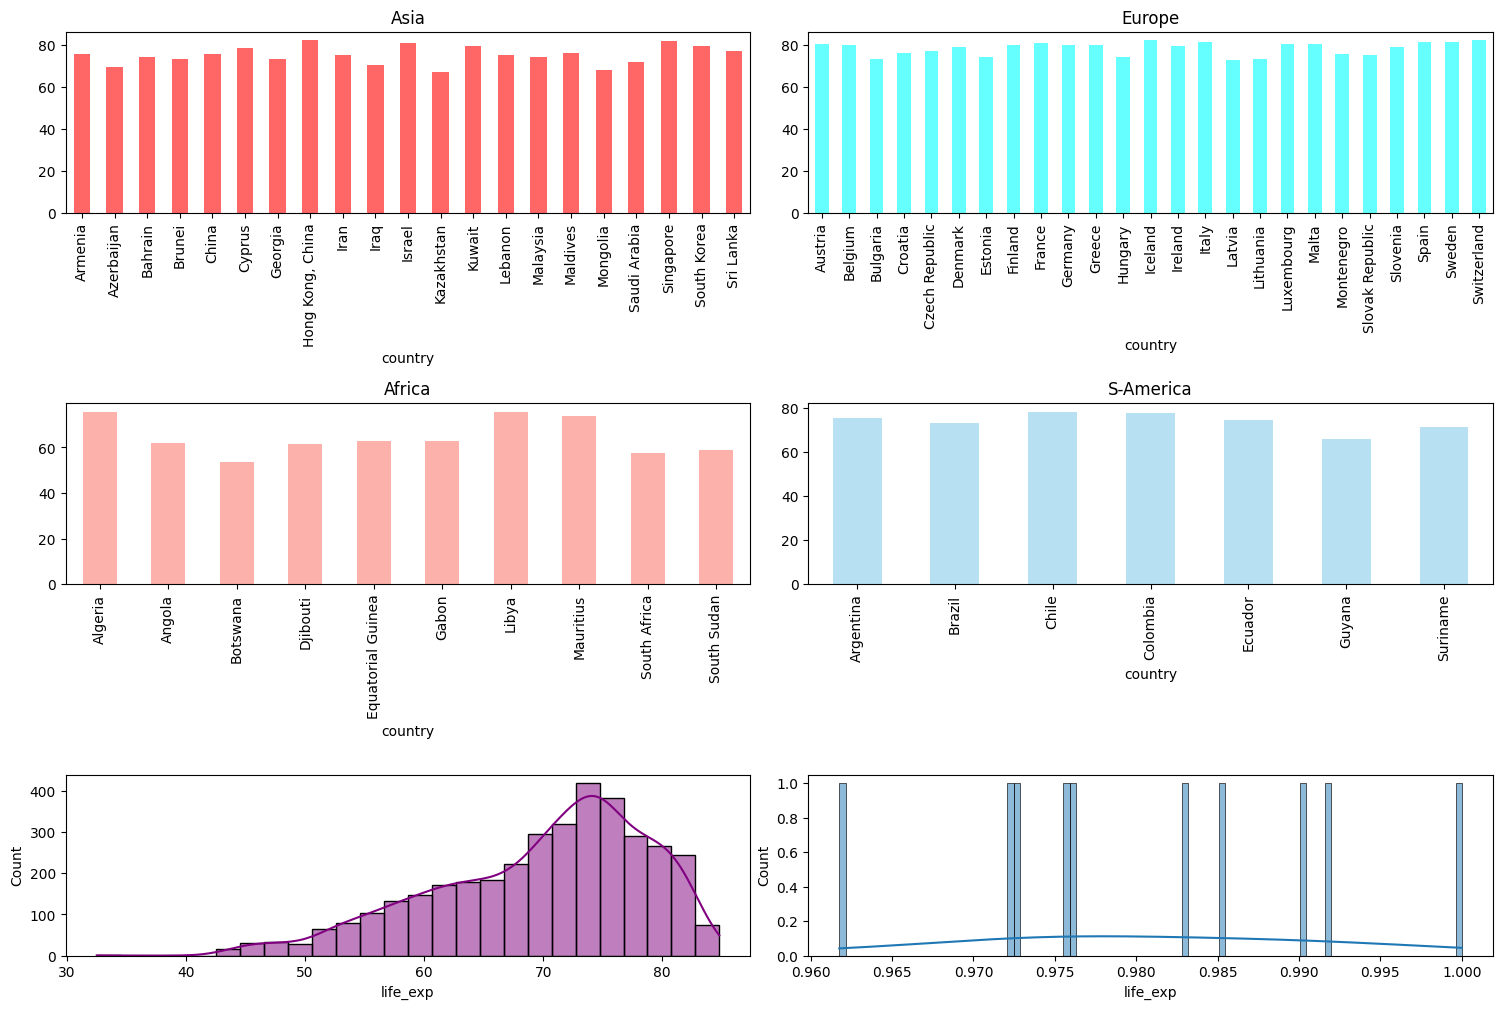

In [135]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
gp1 = data[(data['country'].str.contains(r'^[abcdefghiklmsxyz]', case=False)) & (data['continent'] =='Asia') & (data['gdp'] > 4000 )].groupby('country')['life_exp'].mean().plot.bar(ax=axes[0,0], color='red', alpha=0.6)
axes[0,0].set_title("Asia")

gp2 = data[(data['country'].str.contains(r'^[abcdefghiklmsxyz]', case=False)) & (data['continent'] =='Europe') & (data['gdp'] > 7000 )].groupby('country')['life_exp'].mean().plot.bar(ax=axes[0,1], color='cyan',alpha=0.6)
axes[0,1].set_title("Europe")
gp3 = data[(data['country'].str.contains(r'^[abcdefghiklmsxyz]', case=False)) & (data['continent'] =='Africa') & (data['gdp'] > 4000 )].groupby('country')['life_exp'].mean().plot.bar(ax=axes[1,0], color='salmon',alpha=0.6)
axes[1,0].set_title("Africa")
gp4 = data[(data['country'].str.contains(r'^[abcdefghiklmsxyz]', case=False)) & (data['continent'] =='South America') & (data['gdp'] > 4000 )].groupby('country')['life_exp'].mean().plot.bar(ax=axes[1,1], color='skyblue',alpha=0.6)
axes[1,1].set_title('S-America')
plt.tight_layout()

gp5 = sns.histplot(data['life_exp'], binwidth=2, kde=True, color='purple', ax=axes[2,0])
gp6 = sns.histplot(c['life_exp'], bins = 100, kde=True, ax=axes[2,1])

### Univariate Analysis ###

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      3675 non-null   object 
 1   continent    3675 non-null   object 
 2   year         3675 non-null   int64  
 3   life_exp     3675 non-null   float64
 4   hdi_index    3675 non-null   float64
 5   co2_consump  3671 non-null   float64
 6   gdp          3671 non-null   float64
 7   services     3675 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 229.8+ KB


In [137]:
d=data[['gdp','life_exp']].corr()
d

,gdp,life_exp
gdp,1.000000,0.574641
life_exp,0.574641,1.000000


In [138]:
px.scatter(x=data['gdp'], y=data['life_exp'], opacity=0.6,color=data['gdp'], color_continuous_scale='viridis')

In [139]:
data[(data['gdp']>10000) & (data['life_exp']>70)]['country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain',
       'Barbados', 'Belgium', 'Brunei', 'Canada', 'Chile', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong, China',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Malta', 'Mauritius', 'Netherlands', 'New Zealand',
       'Norway', 'Oman', 'Panama', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russia', 'Saudi Arabia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'St. Lucia',
       'Sweden', 'Switzerland', 'Trinidad and Tobago', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay'], dtype=object)

In [140]:
data[(data['gdp'] > 14600) & (data['life_exp'] > 78)].groupby('country')[['life_exp','hdi_index','co2_consump','services']].mean()

,life_exp,hdi_index,co2_consump,services
country,,,,
Australia,81.519048,0.920762,18.157143,75.766667
Austria,80.385000,0.886050,8.460500,68.000000
Belgium,80.066667,0.908056,10.361111,75.222222
Canada,80.971429,0.896810,17.109524,76.561905
Cyprus,79.792308,0.862231,6.827692,76.938462
Czech Republic,78.942857,0.888857,10.027143,59.185714
Denmark,79.921429,0.925214,7.952143,76.685714
Finland,80.294444,0.913167,10.728889,71.272222
France,81.057143,0.873143,6.301905,73.542857


In [141]:
data.pivot_table(columns='continent', index='year', values='gdp')

continent,Africa,Asia,Europe,North America,Oceania,South America
year,,,,,,
1998,3155.193330,9707.717391,21277.692308,10372.105263,11151.25,5951.818182
1999,3086.170974,9961.108696,21967.692308,10799.473684,11582.50,5792.727273
2000,2976.923128,10543.608696,22953.846154,11123.684211,11788.75,5796.363636
2001,2903.603387,10470.434783,23416.410256,11138.947368,11925.00,5743.636364
2002,2822.930704,10335.446809,23789.230769,11307.894737,12210.00,5628.181818
2003,2755.277629,10590.382979,24128.461538,11548.947368,12455.00,5783.636364
2004,2737.997103,11064.829787,24913.589744,11834.210526,12773.75,6090.000000
2005,2699.226381,11169.978723,25577.435897,12180.000000,13027.50,6346.363636
2006,2644.534091,11559.659574,26516.410256,12656.842105,13205.00,6653.636364


In [142]:
data[(data['life_exp'] == data['life_exp'].min()) & (data['year']== 2010) ]['country']

1419    Haiti
Name: country, dtype: object

In [143]:
fig=px.box(data['life_exp'], color_discrete_sequence=['magenta'], template='plotly_dark')
fig.update_yaxes(title_text='Life Expectancy')
fig.update_xaxes(title_text='Global Distribution Of Life Expectancy')


/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_49459/123605809.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: ylabel='gdp'>

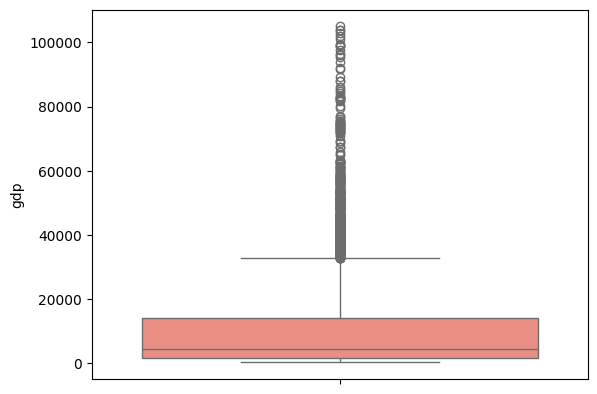

In [144]:
sns.boxplot(data['gdp'], palette=['salmon'])


<Axes: >

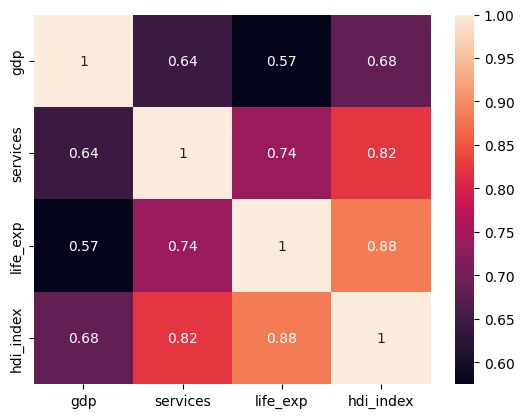

In [145]:
c1 = data[['gdp','services','life_exp','hdi_index']].corr()
sns.heatmap(c1, annot=True)

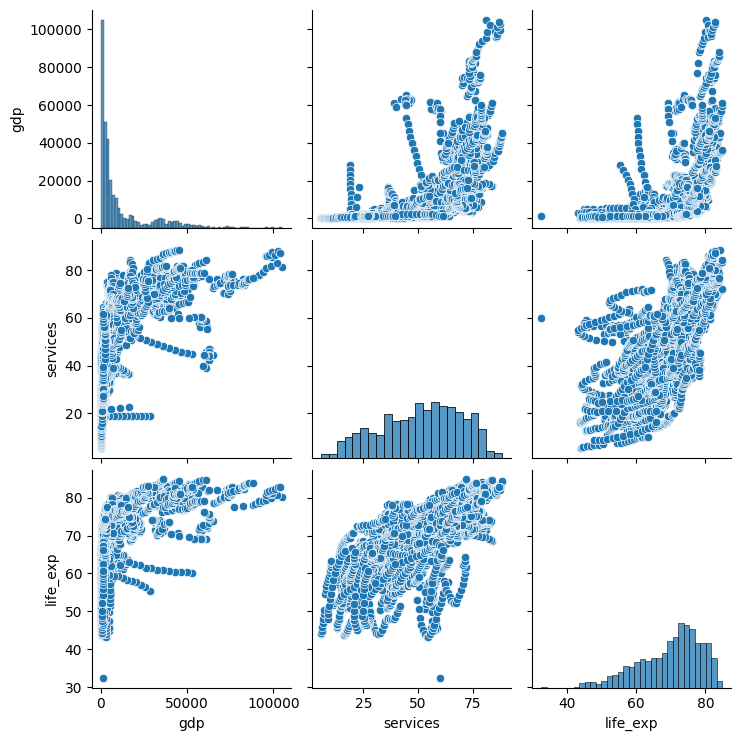

In [146]:
sns.pairplot(data[['gdp','services','life_exp']])

In [147]:
data.sample(5)

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services
2322,Nepal,Asia,2010,69.0,0.537,0.181,732.0,17.0
301,Belgium,Europe,2005,79.3,0.897,11.900,38400.0,73.3
351,Benin,Africa,2013,62.0,0.522,0.488,1050.0,39.3
2744,Russia,Europe,2012,70.5,0.798,11.700,11600.0,64.9
902,Cyprus,Asia,2018,80.8,0.885,6.300,32000.0,81.2


<Axes: xlabel='life_exp', ylabel='services'>

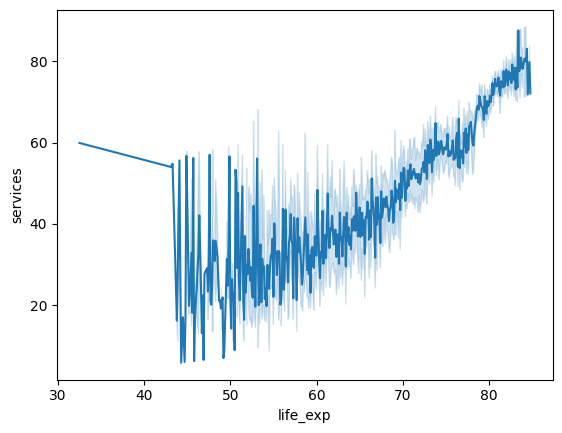

In [148]:
sns.lineplot(data=data, x='life_exp',y='services')

Text(0.5, 1.0, 'Trends in GDP, Life Expectancy, and CO2 Emissions')

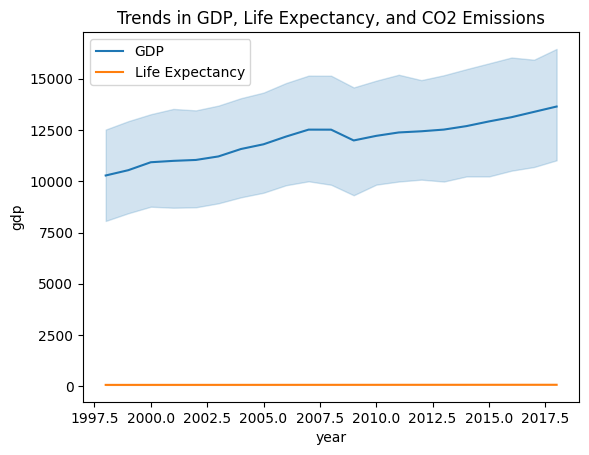

In [149]:
sns.lineplot(data=data, x='year', y='gdp', label='GDP')
sns.lineplot(data=data, x='year', y='life_exp', label='Life Expectancy')
plt.legend()
plt.title('Trends in GDP, Life Expectancy, and CO2 Emissions')

<Axes: xlabel='gdp', ylabel='Count'>

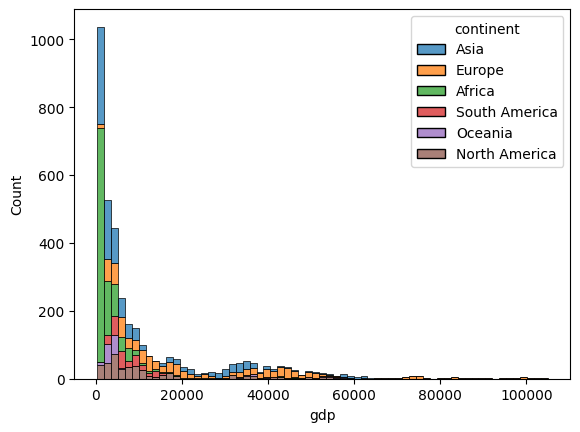

In [150]:
sns.histplot(data, x='gdp', hue='continent', multiple="stack")

<Axes: xlabel='continent', ylabel='life_exp'>

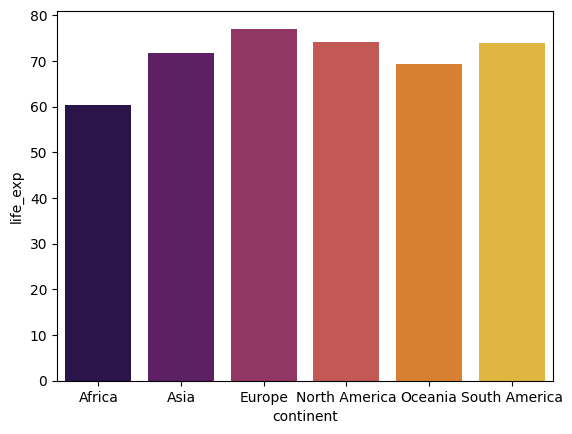

In [151]:
vis=data.groupby('continent')[['life_exp']].mean().reset_index()
sns.barplot(data=vis, x='continent', y='life_exp', hue= 'continent', palette='inferno')


In [152]:
data.drop_duplicates()

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services
0,Afghanistan,Asia,1998,53.3,0.344,0.0522,NaN,24.4
1,Afghanistan,Asia,1999,54.7,0.348,0.0402,NaN,24.6
2,Afghanistan,Asia,2000,54.7,0.350,0.0370,NaN,24.7
3,Afghanistan,Asia,2001,54.8,0.353,0.0376,NaN,24.7
4,Afghanistan,Asia,2002,55.5,0.384,0.0471,333.0,25.6
...,...,...,...,...,...,...,...,...
3670,Zimbabwe,Africa,2014,58.0,0.547,0.8810,1440.0,25.4
3671,Zimbabwe,Africa,2015,58.6,0.553,0.8810,1450.0,25.7
3672,Zimbabwe,Africa,2016,59.2,0.558,0.7710,1430.0,26.1
3673,Zimbabwe,Africa,2017,59.9,0.563,0.8450,1480.0,26.6


In [153]:
dat2 = data.pivot_table(columns='country', index='year',values='life_exp')
dat2


country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1998,53.3,74.8,70.2,50.6,73.7,71.6,79.1,77.9,66.0,71.4,...,69.2,77.5,76.9,74.1,65.4,63.5,71.7,62.5,45.5,49.7
1999,54.7,75.1,70.7,51.9,73.8,71.9,79.4,78.2,66.2,70.8,...,69.2,77.6,76.9,74.4,65.5,63.0,72.0,63.0,45.3,48.5
2000,54.7,75.4,71.0,52.8,74.2,72.4,79.7,78.5,66.5,71.3,...,69.1,78.0,77.0,74.8,65.1,63.6,72.2,63.5,45.3,47.5
2001,54.8,76.0,71.3,53.4,74.3,72.5,80.1,78.9,67.1,71.3,...,69.2,78.3,77.1,75.0,65.1,63.6,72.4,64.0,45.2,47.0
2002,55.5,75.9,71.8,54.5,74.3,72.7,80.3,79.0,67.2,71.9,...,69.4,78.5,77.2,75.0,65.0,63.6,72.5,64.5,45.9,46.6
2003,56.5,75.6,72.0,55.1,74.4,72.8,80.6,79.1,67.1,72.4,...,69.3,78.6,77.3,75.0,64.9,63.7,72.6,64.9,46.6,46.4
2004,57.1,75.8,72.6,55.5,74.9,73.0,80.9,79.5,67.2,72.4,...,69.1,79.0,77.7,75.2,64.8,63.7,72.7,65.3,47.7,46.4
2005,57.6,76.2,72.9,56.4,75.3,73.0,81.2,79.8,67.3,73.2,...,69.2,79.3,77.7,75.5,64.5,63.8,72.8,65.8,48.7,46.8
2006,58.0,76.9,73.3,57.0,75.4,73.1,81.5,80.1,67.7,73.0,...,69.5,79.5,78.0,75.9,65.0,63.9,72.9,66.2,50.0,47.4


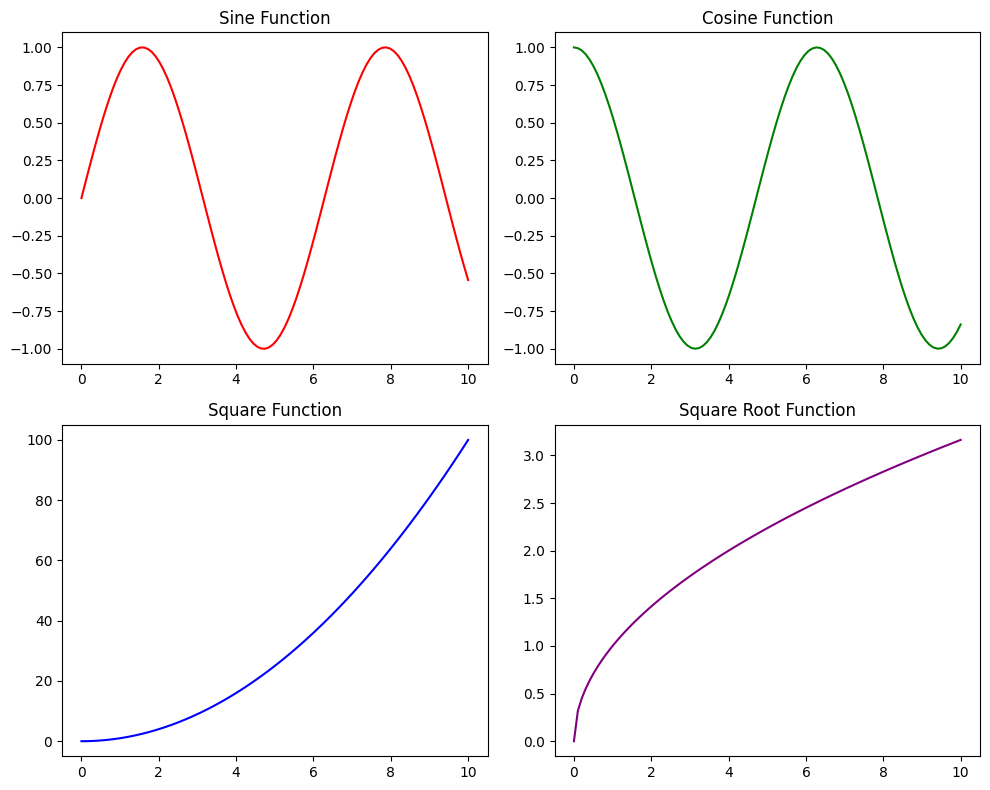

In [154]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x ** 2
y4 = np.sqrt(x)

# Create a figure and 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot data on each subplot
axes[0, 0].plot(x, y1, color='r')
axes[0, 0].set_title('Sine Function')

axes[0, 1].plot(x, y2, color='g')
axes[0, 1].set_title('Cosine Function')

axes[1, 0].plot(x, y3, color='b')
axes[1, 0].set_title('Square Function')

axes[1, 1].plot(x, y4, color='purple')
axes[1, 1].set_title('Square Root Function')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [155]:
print([0]*5)

[0, 0, 0, 0, 0]


In [156]:
data[data['country']=='Russia']

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services
2730,Russia,Europe,1998,67.5,0.705,9.9,5510.0,59.2
2731,Russia,Europe,1999,66.2,0.711,10.1,5880.0,56.0
2732,Russia,Europe,2000,65.6,0.722,10.1,6490.0,56.3
2733,Russia,Europe,2001,65.5,0.728,10.3,6850.0,57.8
2734,Russia,Europe,2002,65.4,0.734,10.3,7210.0,58.5
2735,Russia,Europe,2003,65.2,0.742,10.6,7770.0,59.0
2736,Russia,Europe,2004,65.5,0.748,10.6,8360.0,59.8
2737,Russia,Europe,2005,65.0,0.753,10.8,8930.0,60.6
2738,Russia,Europe,2006,66.5,0.760,11.2,9690.0,61.2
2739,Russia,Europe,2007,67.5,0.769,11.2,10500.0,61.8


In [157]:
plt2=data.sample(21).loc[:,'country'].reset_index().drop(columns='index', inplace = True)

In [158]:
pxplt = data.groupby('year')[['gdp','hdi_index']].mean().reset_index()


In [159]:
piv = data.pivot_table(columns='year', values = 'gdp', index='continent')
piv

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
continent,,,,,,,,,,,,,,,,,,,,,
Africa,3155.193330,3086.170974,2976.923128,2903.603387,2822.930704,2755.277629,2737.997103,2699.226381,2644.534091,2615.508467,...,2485.264706,2439.242647,2305.299020,2360.139706,2295.392157,2294.607843,2266.313725,2345.588235,2467.000000,2587.686275
Asia,9707.717391,9961.108696,10543.608696,10470.434783,10335.446809,10590.382979,11064.829787,11169.978723,11559.659574,11734.765957,...,11253.063830,11598.340426,11901.702128,12000.787234,12135.531915,12262.659574,12398.255319,12576.212766,12696.829787,12845.936170
Europe,21277.692308,21967.692308,22953.846154,23416.410256,23789.230769,24128.461538,24913.589744,25577.435897,26516.410256,27526.923077,...,26083.076923,26507.948718,26836.410256,26719.230769,26876.153846,27327.435897,28106.923077,28631.538462,29320.512821,29992.820513
North America,10372.105263,10799.473684,11123.684211,11138.947368,11307.894737,11548.947368,11834.210526,12180.000000,12656.842105,13003.684211,...,12537.368421,12709.473684,12876.842105,13074.736842,13121.578947,13306.315789,13477.368421,13573.684211,13791.052632,14000.526316
Oceania,11151.250000,11582.500000,11788.750000,11925.000000,12210.000000,12455.000000,12773.750000,13027.500000,13205.000000,13552.500000,...,13476.250000,13571.250000,13783.750000,13983.750000,14162.500000,14400.000000,14593.750000,14853.750000,15055.000000,15218.750000
South America,5951.818182,5792.727273,5796.363636,5743.636364,5628.181818,5783.636364,6090.000000,6346.363636,6653.636364,6989.090909,...,7225.454545,7657.272727,8018.181818,8178.181818,8451.818182,8512.727273,8503.636364,8444.545455,8537.272727,8611.818182


In [160]:
cv = data[data['country'].str.contains(r'ndia$')]
cv2 = data[data['country']=='Russia']
vw = data.groupby('year')[['hdi_index','gdp']].mean().reset_index()


In [161]:
vw['gdp']=vw['gdp']/vw['gdp'].max()
vw['hdi_index'] = vw['hdi_index']/vw['hdi_index'].max()

In [162]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=vw['year'], y=vw['hdi_index'], name='HDI_Index'))
fig.add_trace(go.Scatter(x=vw['year'], y=vw['gdp'], name='GDP'))

fig.update_layout(title="Multiple Line Plots", xaxis_title="Year", yaxis_title="Normalized GDP and HDI Index")
fig.show()

In [163]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=cv['year'], y=cv['co2_consump'], name='India'))
fig.add_trace(go.Scatter(x=cv2['year'], y=cv2['co2_consump'], name='Russia'))

fig.update_layout(title="Multiple Line Plots", xaxis_title="Year", yaxis_title="CO2_Consumption")
fig.show()




In [164]:
list(data.loc[1,:])

['Afghanistan',
 'Asia',
 np.int64(1999),
 np.float64(54.7),
 np.float64(0.348),
 np.float64(0.0402),
 np.float64(nan),
 np.float64(24.6)]

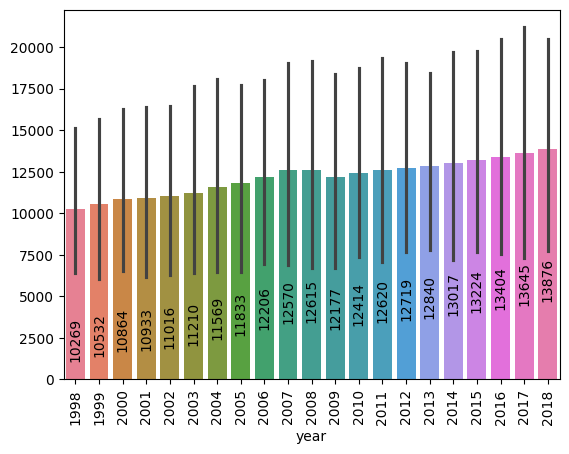

In [165]:
ax = sns.barplot(piv)
plt.xticks(rotation = 90)

for cx in ax.containers:
    ax.bar_label(cx, fmt='%.f', rotation=90, label_type='edge', padding=-110)

plt.show()

In [166]:
import plotly.express as px
px.line_3d(x=pxplt['gdp'], y=pxplt['year'], z=pxplt['hdi_index'], markers=['x'])



In [167]:
px.line_ternary(a=data['co2_consump'], b=data['gdp'], c=data['life_exp'])

In [168]:
data

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services
0,Afghanistan,Asia,1998,53.3,0.344,0.0522,NaN,24.4
1,Afghanistan,Asia,1999,54.7,0.348,0.0402,NaN,24.6
2,Afghanistan,Asia,2000,54.7,0.350,0.0370,NaN,24.7
3,Afghanistan,Asia,2001,54.8,0.353,0.0376,NaN,24.7
4,Afghanistan,Asia,2002,55.5,0.384,0.0471,333.0,25.6
...,...,...,...,...,...,...,...,...
3670,Zimbabwe,Africa,2014,58.0,0.547,0.8810,1440.0,25.4
3671,Zimbabwe,Africa,2015,58.6,0.553,0.8810,1450.0,25.7
3672,Zimbabwe,Africa,2016,59.2,0.558,0.7710,1430.0,26.1
3673,Zimbabwe,Africa,2017,59.9,0.563,0.8450,1480.0,26.6


In [169]:
plt3 = data[data['year']==2018]


In [170]:
data[data['country'].str.contains(r'india', case=False)]

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services
1512,India,Asia,1998,62.1,0.481,0.916,695.0,23.4
1513,India,Asia,1999,62.6,0.489,0.960,743.0,23.7
1514,India,Asia,2000,62.9,0.495,0.975,758.0,24.0
1515,India,Asia,2001,63.3,0.499,0.964,781.0,24.3
1516,India,Asia,2002,63.8,0.506,0.959,797.0,24.5
1517,India,Asia,2003,64.5,0.518,0.983,845.0,24.7
1518,India,Asia,2004,65.2,0.527,1.010,898.0,25.0
1519,India,Asia,2005,65.4,0.536,1.060,954.0,25.2
1520,India,Asia,2006,65.6,0.546,1.110,1010.0,25.5
1521,India,Asia,2007,65.8,0.555,1.180,1080.0,25.8


In [171]:
px.choropleth(data_frame=plt3, locations='country', locationmode='country names', color = 'hdi_index', hover_name='country', hover_data=['gdp','hdi_index'])

In [172]:
c=data[data['country'].str.contains(r'^a')][['country','gdp']]

In [173]:
px.line_polar(data_frame=plt3, r='gdp', theta='country')


In [174]:
c1 = data.groupby('continent')[['gdp','hdi_index','services','life_exp']].mean().reset_index()

In [175]:
ex1 = data[data['country'].str.contains(r'^A', case=False)]

<Axes: xlabel='gdp', ylabel='country'>

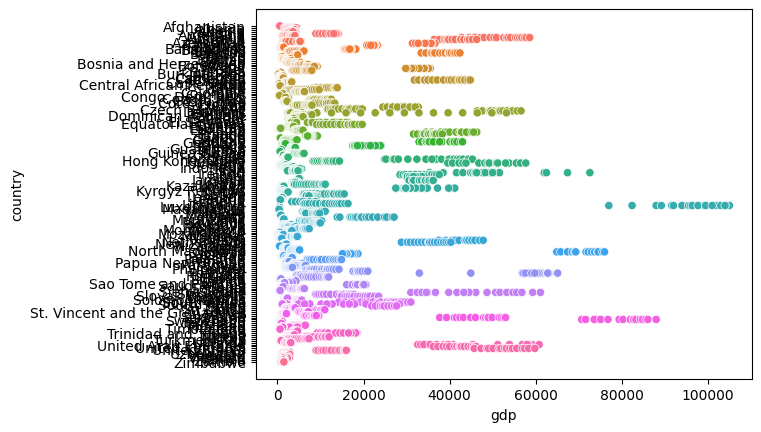

In [176]:
sns.scatterplot(data=data, x='gdp', y='country', hue='country', legend=False)

In [177]:
data222 = {
    'ease_of_use': [80, 70, 65],
    'responsiveness': [75, 85, 90],
    'quality_of_service': [85, 80, 75],
    'overall_satisfaction': [78, 83, 82]
}

df11 = pd.DataFrame(data222)

# Add an index column to be used as the row names
df11['Row'] = ['Online', 'In-Store', 'Phone support']

# Melt the DataFrame for use with px.line_polar
df_melted = df11.melt(id_vars='Row', value_vars=df11.columns[:-1], var_name='Category', value_name='Value')

# Create a radar chart using px.line_polar
fig=px.line_polar(df_melted, r='Value', theta='Category', color='Row',line_close=True,
                    title="Customer Satisfaction Levels Across Different Service Channels", color_discrete_map = {'Online': 'mediumorchid', 'In-Store': 'skyblue', 'Phone Support': 'sandybrown'})

# Show the plot
fig.show()

In [178]:
df_melted

,Row,Category,Value
0,Online,ease_of_use,80
1,In-Store,ease_of_use,70
2,Phone support,ease_of_use,65
3,Online,responsiveness,75
4,In-Store,responsiveness,85
5,Phone support,responsiveness,90
6,Online,quality_of_service,85
7,In-Store,quality_of_service,80
8,Phone support,quality_of_service,75
9,Online,overall_satisfaction,78


In [179]:
df20 = {
    "ease_of_use": [80, 70, 65],
    "responsiveness": [75, 85, 90],
    "quality_of_service": [85, 80, 75],
    "overall_satisfaction": [78, 83, 82]
}
df20 = pd.DataFrame(df20)

In [180]:
onli = df20.loc[0,:]
onst = df20.loc[1,:]
ph = df20.loc[2,:]

In [181]:
categories = ['Ease Of Use','Responsiveness','Quality','Statisfaction']

In [182]:
dta = {
    'teens': [144, 70, 104, 68, 162],
    'adults': [191, 274, 236, 177, 171],
    'seniors': [50, 43, 54, 80, 69]
}
dta=pd.DataFrame(dta)

<Axes: >

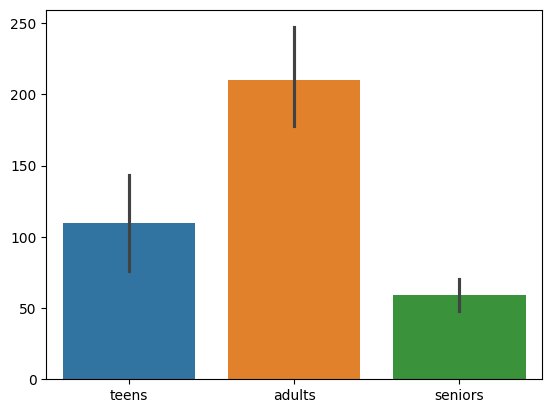

In [183]:
sns.barplot(dta)

In [184]:
stor1 = dta.loc[0,:]
stor2 = dta.loc[1,:]
stor3 = dta.loc[2,:]
stor4 = dta.loc[3,:]
category2 = ['Teens','Adults','Seniors']


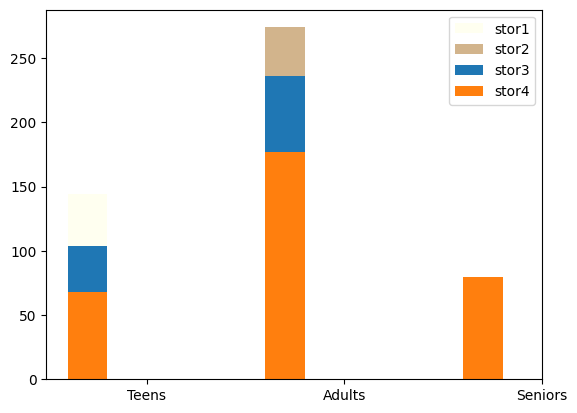

In [185]:
x = np.arange(len(category2))  
width = 0.2

fig, ax = plt.subplots()


ax.bar(x - 1.5 * width, stor1, width, label='stor1', color='ivory')
ax.bar(x - 1.5 * width, stor2, width, label='stor2', color='tan')
ax.bar(x - 1.5 * width, stor3, width, label='stor3')
ax.bar(x - 1.5 * width, stor4, width, label='stor4')

ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in category2])
ax.legend()

plt.show()

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_49459/1545110587.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<BarContainer object of 3 artists>

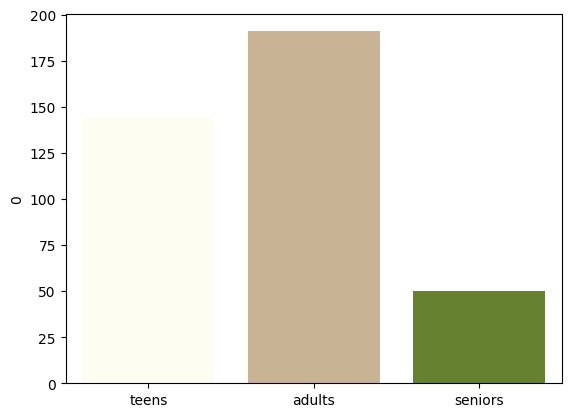

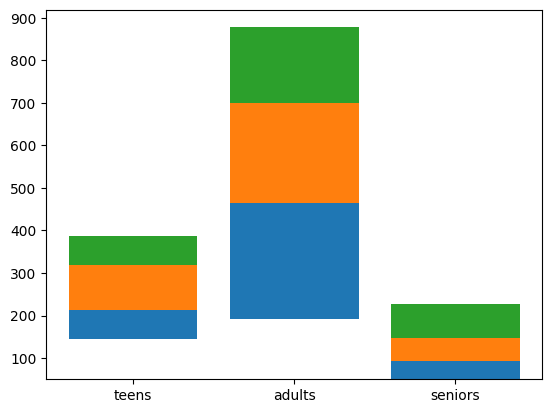

In [186]:
sns.barplot(stor1, palette=['ivory', 'tan', 'olivedrab'])

fig, ax = plt.subplots()

ax.bar(list(stor1.index), stor2, bottom=stor1)
ax.bar(list(stor1.index), stor3, bottom=stor1+stor2)
ax.bar(list(stor1.index), stor4, bottom=stor1+stor2+stor3)

In [187]:
dta.set_index([['Str1', 'Str2', 'Str3', 'Str4','Str5']], inplace=True)
dta.reset_index(inplace=True)

In [188]:
dta

,index,teens,adults,seniors
0,Str1,144,191,50
1,Str2,70,274,43
2,Str3,104,236,54
3,Str4,68,177,80
4,Str5,162,171,69


In [189]:
dta_me=dta.melt(id_vars='index', var_name='Group', value_name='Num')

In [190]:
dta_me

,index,Group,Num
0,Str1,teens,144
1,Str2,teens,70
2,Str3,teens,104
3,Str4,teens,68
4,Str5,teens,162
5,Str1,adults,191
6,Str2,adults,274
7,Str3,adults,236
8,Str4,adults,177
9,Str5,adults,171


Text(0.5, 1.0, 'Customer Demographics')

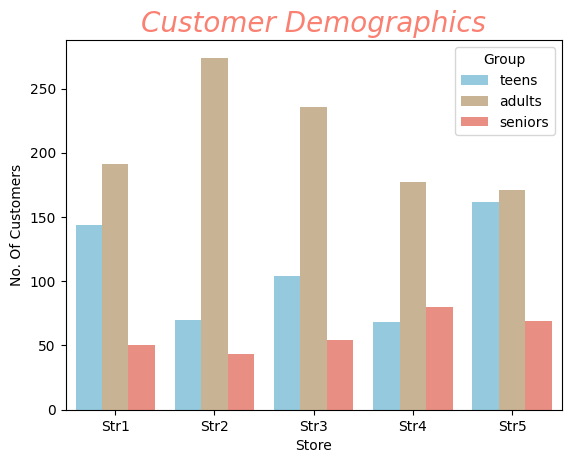

In [191]:
sns.barplot(data=dta_me, x='index', y='Num', palette=['skyblue', 'tan', 'salmon'], hue='Group')
plt.ylabel('No. Of Customers')
plt.xlabel('Store')
plt.title('Customer Demographics', fontdict={'fontsize':20,'color':'salmon', 'fontstyle':'italic'})

In [192]:
def find_largest_number(arr):
    """ 
    :type arr: List[int] 
    :rtype: int 
    """
    res = 0
    for i in arr:
        for j in range(len(arr)):
            
            if arr[j] > i:
                res = arr[j]
            else:
                res = i
    return res

In [193]:
def find_pairs(input):
    """
    :type input: Dict[str, List[int]] 
    :rtype: List[Tuple[int, int]]
    """

    k = input.get("k")
    arr = input.get("arr")
    res=[]
    for i in arr:
        for j in range(len(arr)):
            if (i - arr[j]) == k:
                res.append((i, arr[j]))
    
    return res

In [194]:
input1 = {"k":4, "arr":[8,12,16,17,20]}

In [195]:
input1['arr']

[8, 12, 16, 17, 20]

In [196]:
find_pairs(input1)

[(12, 8), (16, 12), (20, 16)]

In [197]:
cfj = {"k":3, "arr":[4,41,42,44,1]}

In [198]:
find_pairs(cfj)

[(4, 1), (44, 41)]

In [199]:
data['test'] = "this IS A Test"

In [200]:
data['test'] = data['test'].str.lower().str.title()

In [201]:
data['test']

0       This Is A Test
1       This Is A Test
2       This Is A Test
3       This Is A Test
4       This Is A Test
             ...      
3670    This Is A Test
3671    This Is A Test
3672    This Is A Test
3673    This Is A Test
3674    This Is A Test
Name: test, Length: 3675, dtype: object

In [202]:
grp1 =  {
    "metric": ["Carbon Emissions", "Land Use", "Water Use", "Air Pollution", "Waste Generation"],
    "solar": [2, 4, 3, 1, 2],
    "coal": [10, 3, 8, 10, 9],
    "nuclear": [3, 2, 5, 3, 7]
}
# Creating the DataFrame
grp1 = pd.DataFrame(grp1)

In [203]:
grp1

,metric,solar,coal,nuclear
0,Carbon Emissions,2,10,3
1,Land Use,4,3,2
2,Water Use,3,8,5
3,Air Pollution,1,10,3
4,Waste Generation,2,9,7


In [204]:
grp1 = grp1.melt(id_vars='metric', var_name='Type', value_name='Num')

In [205]:
cat = list(grp1['metric'].unique())
cat

['Carbon Emissions',
 'Land Use',
 'Water Use',
 'Air Pollution',
 'Waste Generation']

In [206]:
px.line_polar(grp1, r='Num', theta='metric', color='Type', line_close=True,line_shape='spline', markers='o',color_discrete_map={'solar': 'lightpink', 'coal': 'burlywood', 'nuclear': 'skyblue'})


In [207]:
grp2 =  {
    "metric": ["Carbon Emissions", "Land Use", "Water Use", "Air Pollution", "Waste Generation"],
    "solar": [2, 4, 3, 1, 2],
    "coal": [10, 3, 8, 10, 9],
    "nuclear": [3, 2, 5, 3, 7]
}
grp2 = pd.DataFrame(grp2)

In [208]:
grp2 = grp2.melt(id_vars=['metric'], value_vars=['solar', 'coal', 'nuclear'], 
                    var_name='Source', value_name='Value')

In [209]:
grp2

,metric,Source,Value
0,Carbon Emissions,solar,2
1,Land Use,solar,4
2,Water Use,solar,3
3,Air Pollution,solar,1
4,Waste Generation,solar,2
5,Carbon Emissions,coal,10
6,Land Use,coal,3
7,Water Use,coal,8
8,Air Pollution,coal,10
9,Waste Generation,coal,9


In [210]:
px.line_polar(grp2, r = 'Value', theta='Source', color='metric', line_close=True, line_shape='spline', markers='o')

In [211]:
daa = {
    'brand': ['Brand A', 'Brand B', 'Brand C'],
    'sales': [350000, 450000, 300000]
}

# Convert to DataFrame
daa = pd.DataFrame(daa)

In [212]:
daa

,brand,sales
0,Brand A,350000
1,Brand B,450000
2,Brand C,300000


In [213]:
px.line_polar(daa, r='sales', theta='brand', line_close=True, line_shape='spline')

In [214]:
a1 = {
    'cryptocurrency': ['Bitcoin', 'Ethereum', 'Ripple'],
    'market_performance': [45, 30, 25]
}

# Convert the dictionary into a pandas DataFrame
a1 = pd.DataFrame(a1)

# Display the DataFrame
print(a1)

  cryptocurrency  market_performance
0        Bitcoin                  45
1       Ethereum                  30
2         Ripple                  25


In [215]:
px.line_polar(a1, r='market_performance', theta='cryptocurrency', line_close=True, line_shape='spline')

In [216]:
fig = px.pie(a1, names='cryptocurrency', values='market_performance', color='cryptocurrency', hover_name=['BTC','ETH','XRP'], hole=0.5,
             color_discrete_map={'Bitcoin': 'mistyrose', 'Ethereum': 'plum', 'Ripple': 'magenta'})
fig.show()

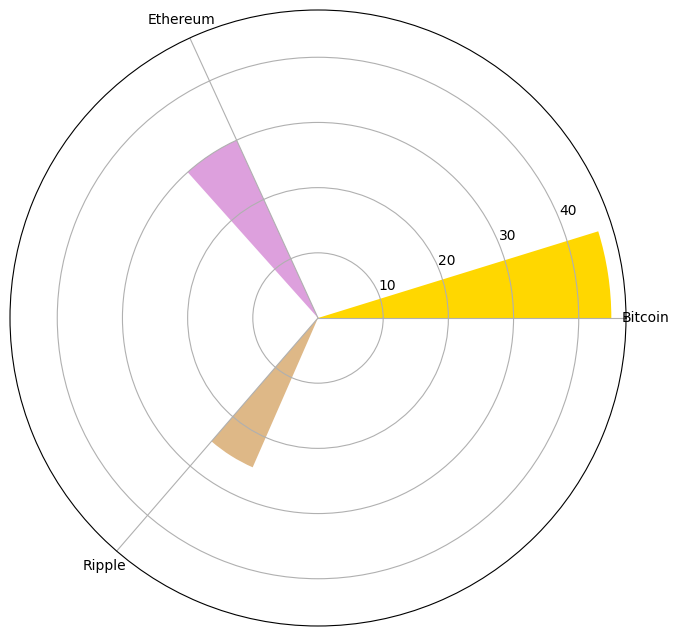

In [217]:
labels = ['Bitcoin', 'Ethereum', 'Ripple']
sizes = [45, 30, 25]
colors = ['gold', 'plum', 'burlywood']

# Create the polar plot
angles = np.linspace(0, 2 * 3, len(labels), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Create a polar area chart
ax.bar(angles, sizes, width=0.3, color=colors, align='edge')

# Set the labels
ax.set_xticks(angles)
ax.set_xticklabels(labels)

# Show the plot
plt.show()

In [226]:
a2 = {
    'city': ['City A', 'City B', 'City C', 'City D', 'City E', 'City F', 'City G', 'City H'],
    'traffic_congestion': [62.93, 72.91, 66.17, 62.69, 55.42, 68.75, 56.26, 83.51],
    'air_pollution': [145.28, 69.85, 122.92, 88.76, 93.85, 140.33, 29.23, 31.33]
}

# Create DataFrame
a2 = pd.DataFrame(a2)


In [227]:
a2 = a2.melt(id_vars='city', var_name='Metric', value_name='Value')

In [228]:
a2

,city,Metric,Value
0,City A,traffic_congestion,62.93
1,City B,traffic_congestion,72.91
2,City C,traffic_congestion,66.17
3,City D,traffic_congestion,62.69
4,City E,traffic_congestion,55.42
5,City F,traffic_congestion,68.75
6,City G,traffic_congestion,56.26
7,City H,traffic_congestion,83.51
8,City A,air_pollution,145.28
9,City B,air_pollution,69.85


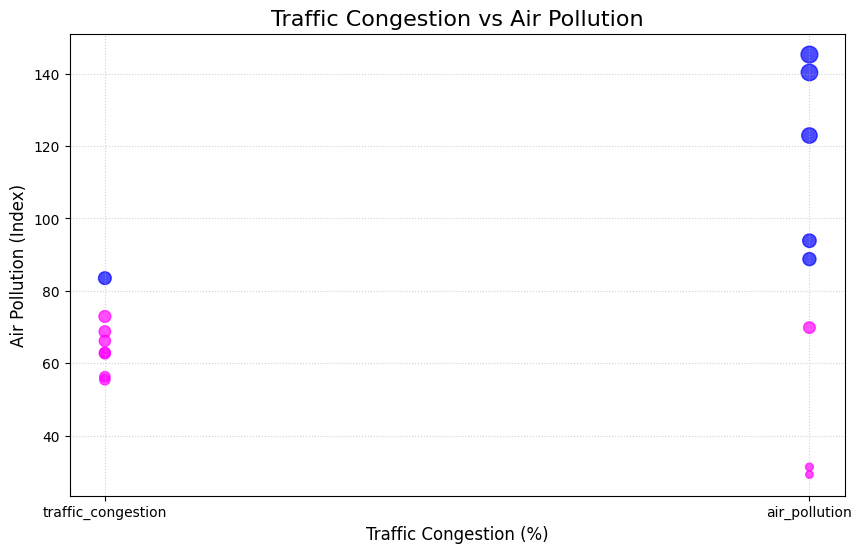

In [229]:
colors = ['magenta' if x < 80 else 'b' for x in a2['Value']]
plt.figure(figsize=(10, 6))
plt.scatter(a2['Metric'], a2['Value'], c=colors, sizes=a2['Value'], alpha=0.7)
plt.title('Traffic Congestion vs Air Pollution', fontsize=16)
plt.xlabel('Traffic Congestion (%)', fontsize=12)
plt.ylabel('Air Pollution (Index)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [230]:
a2['pollution_level'] = ['Low Pollution' if x < 80 else 'High Pollution' for x in a2['Value']]

# Plotly scatter plot
fig = px.scatter(
    a2,
    x='traffic_congestion',
    y='air_pollution',
    color='pollution_level',
    color_discrete_map={'Low Pollution': 'magenta', 'High Pollution': 'red'},
    size_max=100,
    labels={'traffic_congestion': 'Traffic Congestion (%)', 'air_pollution': 'Air Pollution (Index)'},
    title='Traffic Congestion vs Air Pollution',
    hover_name=a2['city']
)
fig.update_traces(marker=dict(size=a2['air_pollution'],line=dict(width=1)))
fig.update_layout(autosize=False, width=900, height=500)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['city', 'Metric', 'Value', 'pollution_level'] but received: traffic_congestion

In [231]:
a3 = {
    "date": [
        "2023-01-31", "2023-02-28", "2023-03-31", "2023-04-30", "2023-05-31", "2023-06-30", "2023-07-31",
        "2023-08-31", "2023-09-30", "2023-10-31", "2023-11-30", "2023-12-31",
        "2023-01-31", "2023-02-28", "2023-03-31", "2023-04-30", "2023-05-31", "2023-06-30", "2023-07-31",
        "2023-08-31", "2023-09-30", "2023-10-31", "2023-11-30", "2023-12-31",
        "2023-01-31", "2023-02-28", "2023-03-31", "2023-04-30", "2023-05-31", "2023-06-30", "2023-07-31",
        "2023-08-31", "2023-09-30", "2023-10-31", "2023-11-30", "2023-12-31"
    ],
    "influencer": [
        "Influencer A"] * 12 + ["Influencer B"] * 12 + ["Influencer C"] * 12,
    "followers": [
        3732, 7339, 9992, 14256, 16091, 17854, 20585, 25016, 27049, 31844, 33121, 35899,
        3328, 7475, 12117, 17161, 21309, 26277, 30139, 32344, 37402, 41501, 45136, 48858,
        4872, 8969, 11870, 13607, 17700, 21020, 25045, 28185, 31548, 33724, 35679, 40660
    ]
}

# Create DataFrame
a3 = pd.DataFrame(a3)

# Convert date column to datetime format
a3['date'] = pd.to_datetime(a3['date'])

In [232]:
px.bar_polar(a3, r='followers', theta='influencer', color='influencer', start_angle=90)

In [233]:
# Create bar chart race

fig = px.bar(
    a3,
    x="followers",
    y="influencer",
    color="influencer",
    animation_frame='date',
    animation_group='influencer',
    orientation="h",
    color_discrete_map={
        'Influencer A': 'deepskyblue',
        'Influencer B': 'hotpink',
        'Influencer C': 'limegreen'
    },
    title="Growth in Social Media Followers Over Time",
    labels={"followers": "Number of Followers", "influencer": "Influencers"}
)

# Adjust figure size
fig.update_layout(height=600, width=1100)

# Show plot
fig.show()

Object `px.bar(color_continuous_scale)` not found.


In [234]:
a3['month'] = a3['date'].dt.month
fig = px.bar(
    a3,
    x='influencer',
    color='followers',
    y='followers',
    animation_frame='month',
    color_continuous_scale='tropic',
    width=10,
    template='plotly_dark'
)
fig.update_layout(height=600, width=500, transition = {'duration':1000})
fig.show()


In [235]:
a3['month'] = a3['date'].dt.month

In [236]:
fig = px.line_polar(
    a3,
    r='followers',
    theta='influencer',
    color='month',
    line_close=True,
    line_shape='spline'
)
fig.update_layout(height=600, width=700, showlegend=True, transition={"duration": 500})
fig.show()

In [317]:
er = np.arange(-100,101)
fig = px.line(np.log10(er), color_discrete_sequence=['plum'])
fig.show()

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_66772/2965524662.py:2: RuntimeWarning:

divide by zero encountered in log10

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_66772/2965524662.py:2: RuntimeWarning:

invalid value encountered in log10



In [1170]:
np.random.rand(3)

array([0.02259408, 0.74372753, 0.29316927])

In [230]:
a4 = data[(data['country']=='India') | (data['country']=='Afghanistan') | (data['country']=='Pakistan') | (data['country']=='Egypt')]

In [231]:
fig = px.bar(
    a4,
    x = 'country',
    y = 'gdp',
    animation_frame='year',
    color='country',
)
fig.update_layout(width=1000)
fig.show()

In [233]:
a5 = {
    "academic_score": [
        94, 97, 50, 53, 53, 89, 59, 69, 71, 86, 73, 56, 74, 74, 62, 51, 88, 89,
        73, 96, 74, 67, 87, 75, 63, 58, 59, 70, 66, 55, 65, 97, 50, 68, 85, 74,
        99, 79, 69, 69, 64, 89, 82, 51, 59, 82, 81, 60, 73, 85, 61, 78, 84, 50,
        50, 86, 55, 88, 90, 67, 65, 54, 91, 92, 81, 51, 51, 89, 91, 85, 88, 61,
        96, 68, 77, 50, 64, 85, 62, 92, 70, 61, 54, 56, 54, 97, 53, 62, 86, 90,
        64, 65, 70, 85, 73, 65, 63, 71, 98, 99
    ],
    "extracurricular_participation": [
        False, False, False, True, False, False, True, True, False, True, True,
        True, True, False, False, True, True, False, True, False, False, False,
        False, True, True, True, False, True, False, False, False, True, False,
        True, True, False, True, False, True, True, False, True, False, True,
        True, False, True, False, True, True, True, False, True, False, True,
        False, True, True, True, True, True, True, False, True, True, False,
        False, True, False, True, True, False, True, True, True, True, False,
        False, True, True, True, False, False, True, True, False, True, True,
        True, True, False, True, False, True, True, True, False, False, False,
        True
    ],
    "participation_label": [
        "Non-Participant", "Non-Participant", "Non-Participant", "Participant",
        "Non-Participant", "Non-Participant", "Participant", "Participant",
        "Non-Participant", "Participant", "Participant", "Participant",
        "Participant", "Non-Participant", "Non-Participant", "Participant",
        "Participant", "Non-Participant", "Participant", "Non-Participant",
        "Non-Participant", "Non-Participant", "Non-Participant", "Participant",
        "Participant", "Participant", "Non-Participant", "Participant",
        "Non-Participant", "Non-Participant", "Non-Participant", "Participant",
        "Non-Participant", "Participant", "Participant", "Non-Participant",
        "Participant", "Non-Participant", "Participant", "Participant",
        "Non-Participant", "Participant", "Non-Participant", "Participant",
        "Participant", "Non-Participant", "Participant", "Non-Participant",
        "Participant", "Participant", "Participant", "Non-Participant",
        "Participant", "Non-Participant", "Participant", "Non-Participant",
        "Participant", "Participant", "Participant", "Participant",
        "Participant", "Non-Participant", "Participant", "Participant",
        "Non-Participant", "Non-Participant", "Participant", "Non-Participant",
        "Participant", "Participant", "Non-Participant", "Participant",
        "Participant", "Participant", "Participant", "Non-Participant",
        "Non-Participant", "Participant", "Participant", "Participant",
        "Non-Participant", "Non-Participant", "Participant", "Participant",
        "Non-Participant", "Participant", "Participant", "Participant",
        "Participant", "Non-Participant", "Participant", "Non-Participant",
        "Participant", "Participant", "Participant", "Non-Participant",
        "Non-Participant", "Non-Participant", "Participant","Participant"
    ]
}

a5 = pd.DataFrame(a5)

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_66772/3225040187.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: ylabel='academic_score'>

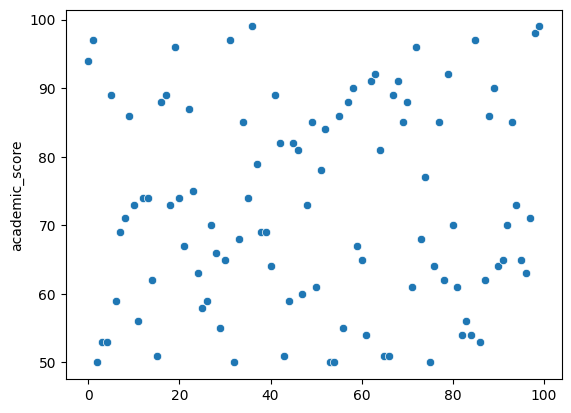

In [239]:
sns.scatterplot(a5['academic_score'], palette=a5['participation_label'])

In [244]:
a5

,academic_score,extracurricular_participation,participation_label
0,94,False,Non-Participant
1,97,False,Non-Participant
2,50,False,Non-Participant
3,53,True,Participant
4,53,False,Non-Participant
...,...,...,...
95,65,True,Non-Participant
96,63,False,Non-Participant
97,71,False,Non-Participant
98,98,False,Participant


In [248]:
a6 = a5.melt(id_vars='extracurricular_participation', value_vars='participation_label',  var_name='participation_label',value_name='acd_score')

In [263]:
a5

,academic_score,extracurricular_participation,participation_label
0,94,False,Non-Participant
1,97,False,Non-Participant
2,50,False,Non-Participant
3,53,True,Participant
4,53,False,Non-Participant
...,...,...,...
95,65,True,Non-Participant
96,63,False,Non-Participant
97,71,False,Non-Participant
98,98,False,Participant


In [309]:

px.scatter(a5,x='academic_score', color='participation_label', template='plotly_dark', color_discrete_map={'Non-Participant':'magenta','Participant':'cyan'})

In [775]:
fig = px.scatter(
    a5,
    x='academic_score',
    color='participation_label',
    color_discrete_sequence=px.colors.sequential.Inferno_r,
    labels={
        "academic_score": "Academic Score",
        "extracurricular_participation": "Extracurricular Participation"
    },
    template='plotly_dark',
    title="Relationship Between Academic Scores and Extracurricular Participation",
)

fig.show()

In [237]:
df44 = px.data.wind()
fig = px.bar_polar(df44, r="frequency", theta="direction", color="strength",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                   title="The Best Graph Till Now",
                   template='plotly_dark'
                  )
fig.update_layout(width=1000, height=800)
fig.show()

In [295]:
df88 = px.data.tips()
fig = px.scatter(df88, x="total_bill", y="tip", color="size",
                 title="Numeric 'size' values mean continuous color")

fig.show()

In [300]:
df00 = px.data.gapminder()
df_2007 = df00.query("year==2007")

for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
    fig = px.scatter(df_2007,
                     x="gdpPercap", y="lifeExp", size="pop", color="continent",
                     log_x=True, size_max=60,
                     template=template, title="Gapminder 2007: '%s' theme" % template)
    fig.show()

In [322]:
a7 = {
    'profession': ['Software Engineer', 'Software Engineer', 'Software Engineer', 
                   'Data Scientist', 'Data Scientist', 'Data Scientist', 
                   'UX Designer', 'UX Designer', 'UX Designer'],
    'annual_salary': [138268, 113567, 112613, 115891, 91243, 111993, 125026, 118600, 109512]
}

# Creating the dataframe
a7 = pd.DataFrame(a7)
a7

,profession,annual_salary
0,Software Engineer,138268
1,Software Engineer,113567
2,Software Engineer,112613
3,Data Scientist,115891
4,Data Scientist,91243
5,Data Scientist,111993
6,UX Designer,125026
7,UX Designer,118600
8,UX Designer,109512


In [340]:
px.box(x=a7['profession'],y=a7['annual_salary'], color=a7['profession'],color_discrete_map={'Software Engineer':'mistyrose','Data Scientist':'cyan','UX Designer':'salmon'},template='plotly_dark')


In [413]:
fig = px.scatter(a7, x='profession', y='annual_salary', color='profession', 
                 color_discrete_map={'Software Engineer': 'cyan', 'Data Scientist': 'magenta', 'UX Designer': 'yellowgreen'}, 
                 size='annual_salary',
                 marginal_y='histogram',
                 template='plotly_dark')

fig.show()

In [377]:
fig = px.bar(a7, x='profession', y='annual_salary', color='profession', 
             color_discrete_map={'Software Engineer': 'cyan', 'Data Scientist': 'magenta', 'UX Designer': 'yellowgreen'}, 
             template='plotly_dark')
fig.show()

In [370]:
fig = px.box(a7, x='profession', y='annual_salary', color='profession', 
             color_discrete_map={'Software Engineer': 'cyan', 'Data Scientist': 'magenta', 'UX Designer': 'yellowgreen'}, 
             points='all', template='plotly_dark')

fig.show()

<Axes: xlabel='profession', ylabel='annual_salary'>

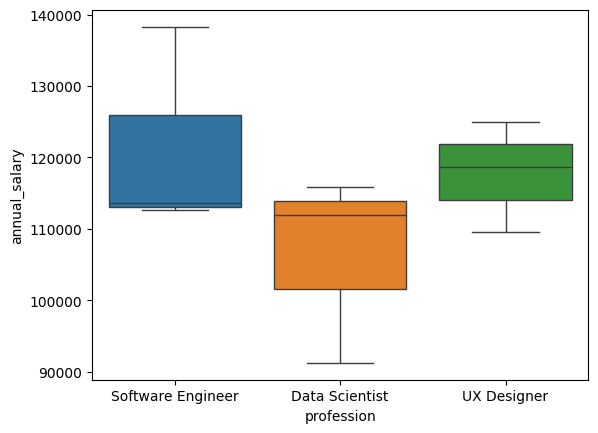

In [338]:
sns.boxplot(x=a7['profession'], y=a7['annual_salary'], hue=a7['profession'])

In [440]:
a8 = {
    "date": [
        "2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05",
        "2023-01-06", "2023-01-07", "2023-01-08", "2023-01-09", "2023-01-10",
        "2023-01-11", "2023-01-12", "2023-01-13", "2023-01-14", "2023-01-15",
        "2023-01-16", "2023-01-17", "2023-01-18", "2023-01-19", "2023-01-20",
        "2023-01-21", "2023-01-22", "2023-01-23", "2023-01-24", "2023-01-25",
        "2023-01-26", "2023-01-27", "2023-01-28", "2023-01-29", "2023-01-30",
        "2023-01-31"
    ],
    "visitors": [
        123, 234, 345, 456, 567, 678, 789, 890, 901, 1012, 
        1123, 1234, 1345, 1456, 1567, 1678, 1789, 1890, 1901, 2012, 
        2123, 2234, 2345, 2456, 2567, 2678, 2789, 2890, 2901, 3012,
        3123
    ]
}
a8 = pd.DataFrame(a8)
a8['date'] = pd.to_datetime(a8['date'])


In [441]:
px.line(x=a8['date'].dt.day, y=a8['visitors'])

In [488]:
a10 = {
    "january": [64, 59, 69, 94],
    "february": [67, 66, 49, 43],
    "march": [84, 57, 39, 55],
    "april": [87, 45, 39, 95],
    "may": [87, 97, 34, 75],
    "june": [29, 92, 59, 48],
    "july": [41, 29, 52, 54],
    "august": [56, 40, 85, 20],
    "september": [90, 89, 29, 20],
    "october": [32, 99, 77, 56],
    "november": [78, 67, 52, 73],
    "december": [85, 84, 51, 25]
}

# Convert the data into a DataFrame
a10 = pd.DataFrame(a10)
a10

,january,february,march,april,may,june,july,august,september,october,november,december
0,64,67,84,87,87,29,41,56,90,32,78,85
1,59,66,57,45,97,92,29,40,89,99,67,84
2,69,49,39,39,34,59,52,85,29,77,52,51
3,94,43,55,95,75,48,54,20,20,56,73,25


In [489]:
a10[''] = ['North','South','East','West']
a10 = a10.set_index('')

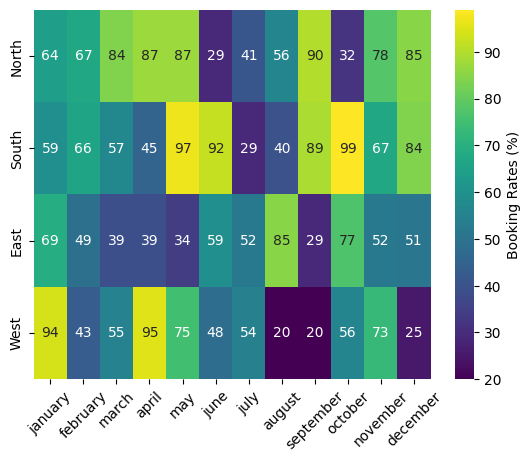

In [499]:
sns.heatmap(a10, cmap='viridis', annot=True, cbar_kws={'label': 'Booking Rates (%)'})
plt.xticks(rotation=45)
plt.show()

In [480]:
px.density_contour(a10, template='plotly_dark')


In [481]:
px.density_heatmap(a10, color_continuous_scale = px.colors.sequential.Plasma_r, template='plotly_dark', title='HeatMap')

In [482]:
a10.reset_index(inplace=True)

In [501]:
a35 = {
    "model": ["Model X", "Model Y", "Model Z", "Model A", "Model B", "Model C"],
    "efficiency": [80, 60, 90, 70, 50, 95],
    "efficiency_category": ["Medium", "Medium", "High", "Medium", "Low", "High"]
}

# Create the DataFrame
a34 = pd.DataFrame(a35)

# Display the DataFrame
print(a34)

     model  efficiency efficiency_category
0  Model X          80              Medium
1  Model Y          60              Medium
2  Model Z          90                High
3  Model A          70              Medium
4  Model B          50                 Low
5  Model C          95                High


In [547]:
px.bar_polar(
    a34,
    r='efficiency',
    theta='model',
    color='efficiency_category',
    template='plotly_dark',
    color_discrete_sequence= px.colors.sequential.thermal_r,
)
fig.update_layout(height=1000,width=800)


In [612]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [614]:
data.sample()

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services,test
1778,Kuwait,Asia,2012,81.0,0.796,29.9,33500.0,73.7,This Is A Test


In [631]:
dkl = {
    "product_category": ["Electronics", "Clothing", "Groceries", "Furniture", "Toys", "Books"],
    "market_size": [3195.25, 3860.76, 3411.05, 3179.53, 2694.62, 3583.58],
    "growth_rate": [9.31, 17.94, 19.31, 8.29, 16.04, 11.05],
    "market_potential": ["High", "Medium", "Low", "High", "Medium", "Low"],
    "bubble_size": [150, 100, 50, 150, 100, 50]
}

a11 = pd.DataFrame(dkl)


In [659]:
px.scatter(a11, x='market_size', y='growth_rate',
           hover_name='product_category',size='bubble_size', color='market_potential', color_discrete_map = {'Low': 'peachpuff', 'Medium': 'limegreen', 'High': 'deepskyblue'})

In [660]:
kj = {
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    '2010': [8008278, 3792621, 2695598, 2099451, 1445632],
    '2015': [8175133, 3980404, 2714856, 2296224, 1563025],
    '2020': [8336817, 3980404, 2746388, 2320268, 1680992],
}

# Create the DataFrame
kj = pd.DataFrame(kj)

In [662]:
kj1 = kj.melt(id_vars='city', var_name='year', value_name='pop_gr')

In [674]:
px.line_polar(kj1,r='pop_gr', theta='year', color='city', line_close=True, line_shape='spline', template='plotly_dark')

In [680]:
px.bar_polar(kj1, r='pop_gr', theta='city',color='city', template='plotly_dark', direction='clockwise')


In [683]:
 a_2 = ['Production Speed',
'Quality Control',
'Cost Efficiency',
'Flexibility',
'Innovation']

# Data
da333 = {
    'plant_a': [80, 90, 70, 85, 75],
    'plant_b': [75, 85, 80, 80, 90],
    'plant_c': [85, 80, 85, 90, 80]
}

# Create the DataFrame
da333 = pd.DataFrame(da333)

In [685]:
da333['Metric'] = a_2

In [689]:
test = da333.melt(id_vars='Metric', var_name='Plant', value_name='Score')

In [737]:
fig = px.line_polar(test, r = 'Score', theta='Metric', color='Plant', color_discrete_map = {'plant_a': 'cyan', 'plant_b': 'mistyrose', 'plant_c': 'magenta'}, line_close=True, template='plotly_dark', markers='*' )
fig.update_layout(height=800)


In [744]:
an = np.array([2,3,4,5])

array([[2],
       [3],
       [4],
       [5]])

In [745]:
cp = np.ones((3,4))
cp/an

array([[0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       ]])

In [750]:
f = np.random.randn(3,4)
f2 = np.random.randn(4,1)

In [762]:
c3 = np.zeros((3,4))

In [763]:
for i in range(3):
  for j in range(4):
    c3[i][j] = f[i][j] + f2[j]

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_66772/2866832203.py:3: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [764]:
c3

array([[-0.15627611, -0.50895606,  2.03956997,  2.0793352 ],
       [-1.53286131,  0.89180177,  0.06885016,  0.6581855 ],
       [ 0.29129751,  0.54415329, -0.05930429,  2.37963651]])

In [771]:
c4 = f + f2

In [770]:
f2 = f2.reshape(1,4)

In [768]:
f

array([[ 0.16119418, -0.20836849,  1.03438183,  1.39692075],
       [-1.21539102,  1.19238934, -0.93633798, -0.02422895],
       [ 0.6087678 ,  0.84474085, -1.06449244,  1.69722207]])